# **Regularization**

## **Overfitting and Underfitting**

In the house price regression exercise, we could notice that the performance of
our model on the held-out validation data would always peak after a few epochs
and would then start degrading, i.e. our model would quickly start to overfit to
the training data. Overfitting happens in every single machine learning problem.
To prevent a model from learning misleading or irrelevant patterns found in the
training data, the best solution is of course to get more training data. A model
trained on more data will naturally generalize better. When that is no longer
possible, the next best solution is to modulate the quantity of information that
your model is allowed to store, or to add constraints on what information it
is allowed to store. If a network can only afford to memorize a small number
of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.The processing
of fighting overfitting in this way is called regularization.

## Exe 1

1 Load IMDB dataset from Keras with maximum number of num words =
10000 to include. It is a large dataset containing the text of 50, 000 movie reviews from the Internet Movie Database. This is a dataset for binary sentiment
classification of movies containing {0, 1}. Check train and test datasets sizes
and shapes.

(https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)

In [1]:
# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
 (x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=10000, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3) #num_words keep les num_word mots les plus récurrents

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print("train size : ", len(x_train), " and shape : ", x_train.shape )
print("test size : ", len(x_test), " and shape : ", x_test.shape)

train size :  25000  and shape :  (25000,)
test size :  25000  and shape :  (25000,)


each row of the datasets has a different lenght

In [4]:
x_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

## Exe 2

In [5]:
def vectorize_sequences ( sequences , dimension =10000) :
  # Create an all - zero matrix of shape ( len ( sequences ), dimension)
  results = np . zeros (( len ( sequences ) , dimension ))
  for i , sequence in enumerate ( sequences ):
    results[i , sequence ] = 1 # set specific indices of
  #results [i] to 1s
  return results
# Our vectorized training data
x_train = vectorize_sequences ( x_train )
# Our vectorized test data
x_test = vectorize_sequences ( x_test )
# Our vectorized labels
y_train = np . asarray ( y_train ). astype ('float32')
y_test = np . asarray ( y_test ) . astype ('float32')

In [6]:
print("train size : ", len(x_train), " and shape : ", x_train.shape )
print("test size : ", len(x_test), " and shape : ", x_test.shape)

train size :  25000  and shape :  (25000, 10000)
test size :  25000  and shape :  (25000, 10000)


**Check new train and test sets shapes and sizes. What have changed?**

Now the row's datasets all have a lenght of 10000 

**The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer).** Intuitively, a model with
more parameters will have more ”memorization capacity” and therefore will be
able to easily learn a perfect dictionary-like mapping between training samples
and their targets, a mapping without any generalization power. Always keep
this in mind: **deep learning models tend to be good at fitting to the training
data, but the real challenge is generalization, not fitting.**
On the other hand, if the network has limited memorization resources, it will
not be able to learn this mapping as easily, and thus, in order to minimize its
loss, it will have to resort to learning compressed representations that have **predictive power regarding the targets – precisely the type of representations that
we are interested in.** At the same time, keep in mind that you should be using models that have enough parameters that they won’t be underfitting: your
model shouldn’t be starved for memorization resources. There is a compromise
to be found between “too much capacity” and “not enough capacity”.
**Unfortunately, there is no magical formula to determine what the right number
of layers is, or what the right size for each layer is. You will have to evaluate an
array of different architectures (on your validation set, not on your test set) in
order to find the right model size for your data.** The general workflow to find
an appropriate model size is to start with relatively few layers and parameters,
and start increasing the size of the layers or adding new layers until you see
diminishing returns with regard to the validation loss.


## Exe 3

**Reducing the network size**

Design a neural network model named
original model with two dense layers of size 16 and each followed with an
activation function relu. Add a final layer of 1 node and an activation function
of sigmoid. For your network compilation, define a rmsprop optimizer, with a
binary crossentropy and acc as the metric.


In [7]:
original_model = keras.Sequential ([
keras.layers.Dense (16 , activation ='relu', input_shape =(10000 ,)) ,
keras.layers.Dense (16 , activation ='relu') ,
keras.layers.Dense (1, activation="sigmoid")])

#relu : A different kind of nonlinearity is used by the restricted linear unit (ReLU) neuron. It
# uses the function f (z) = max (0, z) , si c'est négatif alors c'est nul

#sigmoid : to introduce nonlinearity :  the sigmoid neuron -> Intuitively, this means that when the logit is very small, the output of a logistic neu‐ron is very close to 0.
# When the logit is very large, the output of the logistic neuron is
# close to 1. In-between these two extremes, the neuron assumes an S-shape,

original_model.compile( optimizer ='rmsprop',loss ='binary_crossentropy', metrics =[ 'accuracy' ])

# rmsprop : un algorithme d'optimisation qui accélère la descente de gradient, il est utilisé pour entraîner des modèles à base de réseaux de neurones profonds
# 

## Exe 4

Design a neural network model named smaller model with two dense
layers of size 4 and each followed with an activation function relu. Add a final
layer of 1 node and an activation function of sigmoid. For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as
the metric.

In [8]:
smaller_model = keras.Sequential ([
keras.layers.Dense (4 , activation ='relu', input_shape =(10000 ,)) ,
keras.layers.Dense (4 , activation ='relu') ,
keras.layers.Dense (1, activation="sigmoid")])

smaller_model.compile ( optimizer ='rmsprop',loss ='binary_crossentropy', metrics =[ 'accuracy' ])

## Exe 5

Fit the original model on the train set with the test set as the
validation set, 20 epochs and batch size = 512 and save it in original hist.


In [9]:
original_hist = original_model.fit( x_train , y_train , epochs =20, batch_size=512, validation_data=(x_test, y_test)) #batch-size : taille échantillon

Epoch 1/20
49/49 [==============================] - 3s 58ms/step - loss: 0.5431 - accuracy: 0.7415 - val_loss: 0.3422 - val_accuracy: 0.8741
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2668 - accuracy: 0.9111 - val_loss: 0.2878 - val_accuracy: 0.8860
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1987 - accuracy: 0.9329 - val_loss: 0.2894 - val_accuracy: 0.8848
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1713 - accuracy: 0.9396 - val_loss: 0.3034 - val_accuracy: 0.8810
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1359 - accuracy: 0.9540 - val_loss: 0.3152 - val_accuracy: 0.8802
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1208 - accuracy: 0.9606 - val_loss: 0.3777 - val_accuracy: 0.8639
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1057 - accuracy: 0.9637 - val_loss: 0.3628 - val_accuracy: 0.8713
Epoch 8/20
49

## Exe 6

Fit the smaller model on the train set with the test set as the validation set,
20 epochs and batch size = 512 and save it in smaller hist.

In [10]:
smaller_hist = smaller_model.fit( x_train , y_train , epochs =20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6632 - accuracy: 0.6096 - val_loss: 0.5773 - val_accuracy: 0.7287
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5443 - accuracy: 0.8025 - val_loss: 0.5223 - val_accuracy: 0.7939
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4855 - accuracy: 0.8580 - val_loss: 0.4865 - val_accuracy: 0.8512
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4488 - accuracy: 0.8937 - val_loss: 0.4646 - val_accuracy: 0.8636
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4172 - accuracy: 0.9092 - val_loss: 0.4487 - val_accuracy: 0.8734
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3947 - accuracy: 0.9242 - val_loss: 0.4418 - val_accuracy: 0.8656
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3744 - accuracy: 0.9323 - val_loss: 0.4337 - val_accuracy: 0.8685
Epoch 8/20
49

The accuracy on the train dataset is slightly worse than with the original_model.

## Exe. 7 

Get the val loss from the trained model histogram and save them in
new variables.


In [11]:
val_loss_original, val_loss_smaller = original_hist.history['val_loss'], smaller_hist.history['val_loss']

## Exe. 8 

Plot the validation loss values w.r.t the epochs (we have 20 epochs)
and observe the loss value changing trough the epochs increase. What do you
observe? which network starts overfitting later? after hom many epochs each
network starts overfitting?. Notice that the loss should reduce during the epochs
changing, as soon as the loss starts to increase, overfitting happens. (you should
have a figure more or less similar to figure 1)


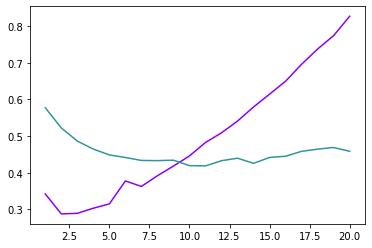

In [12]:
import matplotlib.pyplot as plt
epochs = list(range(1, 21))
plt.plot(epochs, val_loss_original, '#8800FF') #violet
plt.plot(epochs, val_loss_smaller, '#2F9599') #bleu
plt.show()


Both models are overfitting : 
The original model starts overfitting around the 3rd epoch, while the
Smaller model starts overfitting later, around the 7th epoch.

## Exe 9

Design a network that has much more capacity, far more than the problem would warrant. Call this model bigger model with two dense layers of size 512 and each followed with an activation function relu. Add a final layer of 1
node and an activation function of sigmoid. For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric

In [13]:
bigger_model = keras.Sequential ([
keras.layers.Dense (512 , activation ='relu', input_shape =(10000 ,)) ,
keras.layers.Dense (512 , activation ='relu') ,
keras.layers.Dense (1, activation="sigmoid")])

bigger_model.compile ( optimizer ='rmsprop',loss ='binary_crossentropy', metrics =[ 'accuracy' ])

## Exe 10

Fit the bigger model on the train set with the test set as the validation set,
20 epochs and batch size = 512 and save it in bigger hist

In [14]:
bigger_hist = bigger_model.fit( x_train , y_train , epochs =20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 19s 374ms/step - loss: 0.6145 - accuracy: 0.7199 - val_loss: 0.3688 - val_accuracy: 0.8456
Epoch 2/20
49/49 [==============================] - 15s 318ms/step - loss: 0.2296 - accuracy: 0.9095 - val_loss: 0.2799 - val_accuracy: 0.8866
Epoch 3/20
49/49 [==============================] - 16s 320ms/step - loss: 0.1191 - accuracy: 0.9577 - val_loss: 0.4263 - val_accuracy: 0.8588
Epoch 4/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0881 - accuracy: 0.9778 - val_loss: 0.6110 - val_accuracy: 0.8524
Epoch 5/20
49/49 [==============================] - 16s 324ms/step - loss: 0.0403 - accuracy: 0.9936 - val_loss: 0.5013 - val_accuracy: 0.8804
Epoch 6/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6980 - val_accuracy: 0.8785
Epoch 7/20
49/49 [==============================] - 16s 323ms/step - loss: 0.0465 - accuracy: 0.9962 - val_loss: 0.7028 - val_accuracy: 0.8748

# Exe 11

Plot the bigger and original validation loss changing w.r.t epochs
changing. Similar to exercise 18. How the bigger network loss changes regarding to the original network. The more capacity the network has, the quicker it
will be able to model the training data, but if it converges quickly to 0, this is
more susceptible for overfitting!


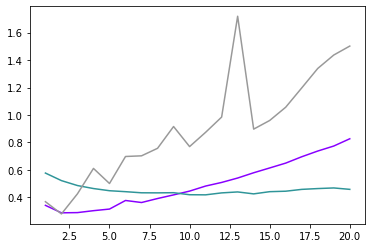

In [15]:
val_loss_bigger = bigger_hist.history['val_loss']
epochs = list(range(1, 21))
plt.plot(epochs, val_loss_original, '#8800FF')
plt.plot(epochs, val_loss_smaller, '#2F9599')
plt.plot(epochs, val_loss_bigger, '#999999')
plt.show()

The bigger model overfits since the 2nd epoch.


## Exe 12 **weight regularization**

Given two explanations for something, the explanation most likely to be correct
is the ”simplest” one, the one that makes the least amount of assumptions. This
is called “Occam’s Razor principle”. This also applies to the models learned by
neural networks: given some training data and a network architecture, there are
multiple sets of weights values (multiple models) that could explain the data,
and simpler models are less likely to overfit than complex ones.
A “simple model” in this context is a model where the distribution of parameter
values has less entropy (or a model with fewer parameters altogether, as we saw
above). Thus a common way to mitigate overfitting is to put constraints on the
complexity of a network by forcing its weights to only take small values, which
makes the distribution of weight values more ”regular”. This is called ”weight
regularization”, and it is done by adding to the loss function of the network a
cost associated with having large weights. This cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the “L1 norm” of
the weights).
* L2 regularization, where the cost added is proportional to the square of
the value of the weights coefficients (i.e. to what is called the “L2 norm” of
the weights). L2 regularization is also called weight decay in the context of
neural networks. Don’t let the different name confuse you: weight decay
is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing weight regularizer instances
to layers as keyword arguments: for instance, kernel regularizer=
regularizers.l1(0.001) where l2(0.001) means that every coefficient in the
weight matrix of the layer will add 0.001 * weight coefficient value to the total
loss of the network. Note that because this penalty is only added at training
time, the loss for this network will be much higher at training than at test time

 Modify the original network as l2 model by adding an L2 weight
regularization to the model1
. Add the L2 regularizers to the first two layers.

In [16]:
from keras import regularizers

kernel_reg = regularizers.l2(0.001)

l2_model = keras.Sequential([keras.layers.Dense(16,"relu",kernel_regularizer=kernel_reg),keras.layers.Dense(16,"relu",kernel_regularizer=kernel_reg),keras.layers.Dense(1,"sigmoid")])
l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

## Exe 13

Fit the model on train set with previously presented parameters.

In [17]:
l2_hist = l2_model.fit( x_train , y_train , epochs =20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.5829 - acc: 0.7401 - val_loss: 0.3739 - val_acc: 0.8825
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3176 - acc: 0.9090 - val_loss: 0.3337 - val_acc: 0.8905
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2644 - acc: 0.9255 - val_loss: 0.3475 - val_acc: 0.8800
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2423 - acc: 0.9306 - val_loss: 0.3460 - val_acc: 0.8815
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2330 - acc: 0.9357 - val_loss: 0.3454 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2250 - acc: 0.9412 - val_loss: 0.3522 - val_acc: 0.8820
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2130 - acc: 0.9448 - val_loss: 0.3616 - val_acc: 0.8770
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2079 - a

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit